In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## Importar archivo "Mall_Customers.csv" de https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/data


In [3]:
df = pd.read_csv("C:/Users/nicol/OneDrive/Escritorio/Proyectos/Mall Customers/Mall_Customers.csv")

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


####    El spending Score hace referencia a que tanto compra un cliente.

# Análisis exploratorio de los datos

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


3. Verificar si es que hay datos faltantes

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Análisis de las distribuciones de las variables

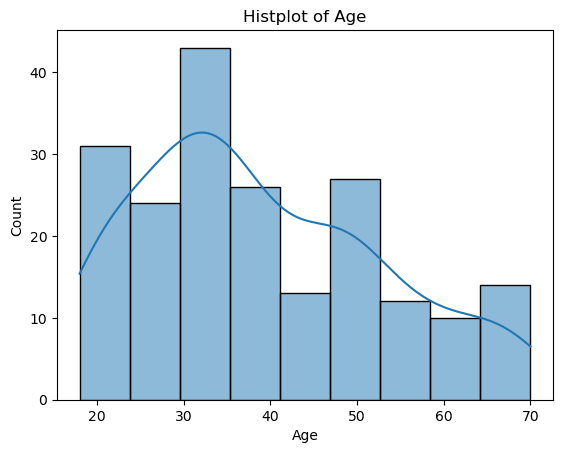

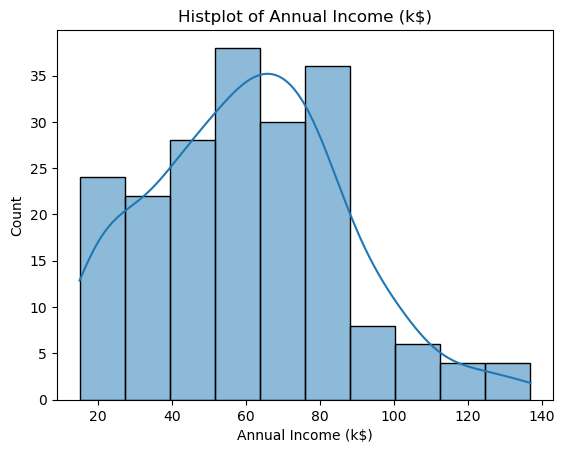

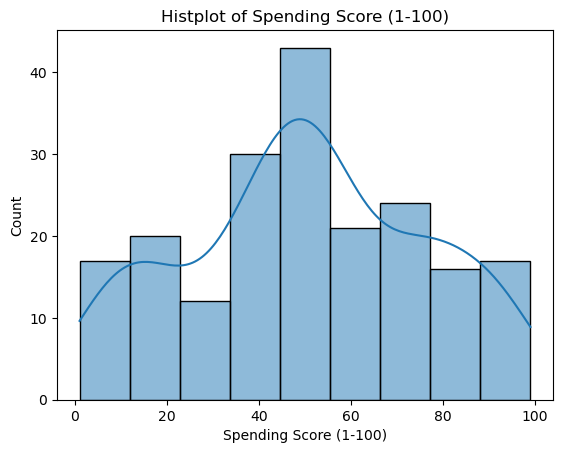

In [7]:
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    sns.histplot(df[x], kde = True)
    plt.title(f'Histplot of {x}')
    plt.show()

<Axes: xlabel='Gender', ylabel='count'>

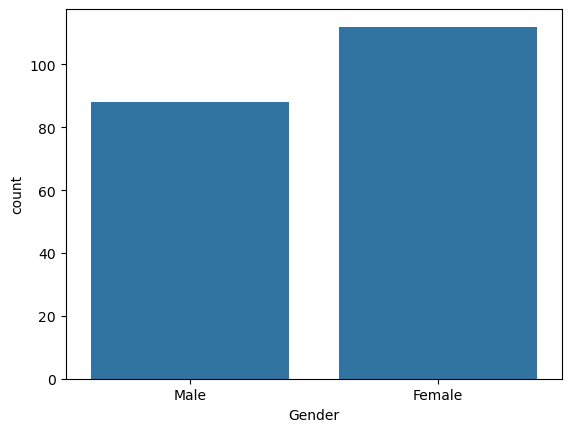

In [8]:
sns.countplot(x = 'Gender' , data = df)

# Análisis de correlación de las variables

In [9]:
df.iloc[:,2:5].corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


# Normalización de los datos

In [10]:
df_integer = df.iloc[:,2:]
df_norm = (df_integer-df_integer.min())/(df_integer.max()-df_integer.min())
df_norm.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959


# Realizamos clusterización segun las variables Age y Annual Income (k$)


In [11]:
modelo = KMeans(
        n_clusters = 5,
        n_init = 10,
        max_iter=300
    )

modelo.fit(df_norm)
modelo.labels_
modelo.inertia_

c:\Users\nicol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


10.30396489253412

In [12]:
data = df_norm.loc[: , ['Age','Annual Income (k$)']]
suma_error = []
for i in range(2 , 11):
    modelo = KMeans(
        n_clusters = i,
        n_init = 10 ,
        max_iter=300
    )
    modelo.fit(data)
    suma_error.append(modelo.inertia_)

c:\Users\nicol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nicol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nicol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nicol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

In [13]:
suma_error

[13.028938428018286,
 7.492113413237458,
 6.0728847287425545,
 4.713416604872825,
 3.862700222799282,
 3.0580611070789883,
 2.64269394692181,
 2.3135720353543285,
 2.132365213773093]

<Axes: >

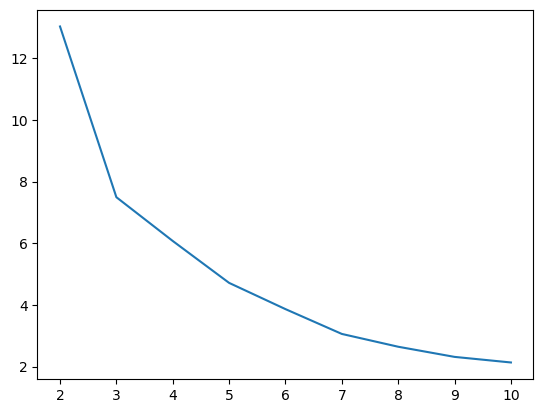

In [14]:
sns.lineplot(
    x = range(2, len(suma_error) + 2),
    y = suma_error
)

<Axes: xlabel='clusters', ylabel='Error'>

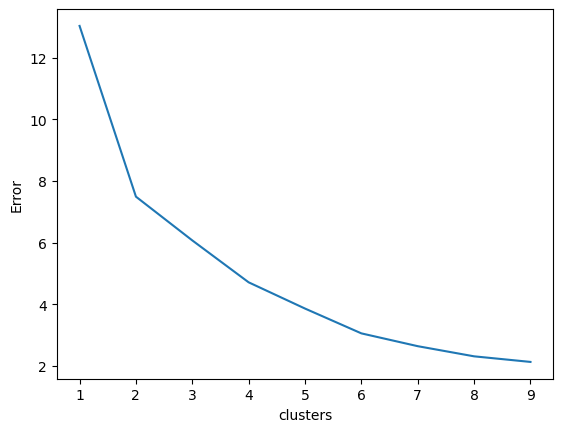

In [15]:
tabla_codo = pd.DataFrame(
    {
        "clusters": range(1, len(suma_error) + 1),
        "Error": suma_error
    }
)
sns.lineplot(data = tabla_codo, x = "clusters", y = "Error")

In [16]:
modelo = KMeans(
    n_clusters = 3,
    n_init = 10,
    max_iter=3000,
    random_state = 1
)
modelo.fit(data)
df1 = df.copy()
df1["Cluster"] = modelo.labels_

c:\Users\nicol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

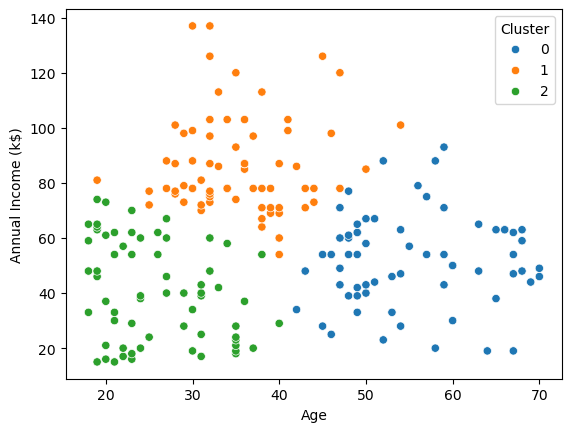

In [17]:
sns.scatterplot(
    data = df1,
    x = "Age", 
    y = "Annual Income (k$)", 
    hue = "Cluster",
    palette = "tab10"
)

In [18]:
from sklearn.metrics import silhouette_score

# Métricas para K-Means
data = df_norm.loc[: , ['Age','Annual Income (k$)']]

silhouette_kmeans = silhouette_score(data, df1["Cluster"])
print("\nMétricas para K-Means:")
print("Silhouette Score:", silhouette_kmeans)


Métricas para K-Means:
Silhouette Score: 0.44048063969161466


In [19]:
df1.iloc[:,2:].groupby("Cluster").agg(["mean","count", "max", "min"])

Age               Annual Income (k$)                 \
              mean count max min               mean count  max min   
Cluster                                                              
0        55.415385    65  70  42          51.923077    65   93  19   
1        35.323944    71  54  19          86.422535    71  137  54   
2        25.937500    64  40  18          40.640625    64   74  15   

        Spending Score (1-100)                
                          mean count max min  
Cluster                                       
0                    38.861538    65  60   3  
1                    55.732394    71  97   1  
2                    55.578125    64  99   5

#### Cluster 0: Adultos mayores con gasto moderado
* **Edad promedio:** 53.4 años (mayores del conjunto)

* **Ingreso promedio:** $46.96$k$ (medio-bajo)

* **Spending Score:** $39.8$ (gasto moderado)

> **Interpretación:** Este cluster representa a los clientes **maduros y estables**, que tienen ingresos moderados y son prudentes o conservadores con sus gastos. Podrían ser personas enfocadas en el ahorro, cubriendo necesidades básicas o minimizando gastos no esenciales.

---

#### Cluster 1: Jóvenes con ingresos medios y alto gasto
* **Edad promedio:** $28.5$ años (los más jóvenes)

* **Ingreso promedio:** $60.24$k$ (medio-alto)

* **Spending Score:** $70.4$ (**muy alto**)

> **Interpretación:** Este cluster incluye a **adultos jóvenes o profesionales principiantes** que, a pesar de tener ingresos intermedios (algunos muy altos, otros bajos), muestran una **fuerte propensión al gasto**. Podrían ser compradores impulsivos, personas que buscan experiencias, o aquellos que aún no priorizan el ahorro.

---

#### Cluster 2: Adultos con altos ingresos pero bajo gasto
* **Edad promedio:** $38.9$ años

* **Ingreso promedio:** $84.7$k$ (**los más altos**)

* **Spending Score:** $19.2$ (**muy bajo**)

> **Interpretación:** Este cluster está formado por clientes con **altos ingresos** que son extremadamente **frugales o se enfocan fuertemente en el ahorro/inversión**. Podrían ser profesionales de éxito que tienen metas financieras agresivas o que simplemente tienen un estilo de vida de bajo consumo a pesar de su capacidad económica.

# Realizamos clusterización segun las variables Annual Income (k$) y Spending Score (1-100)

In [20]:
data = df_norm.loc[: , ['Spending Score (1-100)', 'Annual Income (k$)']]
suma_error = []
for i in range(1 , 11):
    modelo = KMeans(
        n_clusters = i,
        n_init = 10 ,
        max_iter=300
    )
    modelo.fit(data)
    suma_error.append([i, modelo.inertia_])

c:\Users\nicol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nicol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nicol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nicol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

In [21]:
suma_error

[[1, 23.04072032603991],
 [2, 13.993505283127977],
 [3, 9.058985215159453],
 [4, 6.110312266413656],
 [5, 3.5831179059525615],
 [6, 3.100343570751375],
 [7, 2.641641737655628],
 [8, 2.2173076905613995],
 [9, 2.0105870149019944],
 [10, 1.665231990710676]]

<Axes: xlabel='clusters', ylabel='Error'>

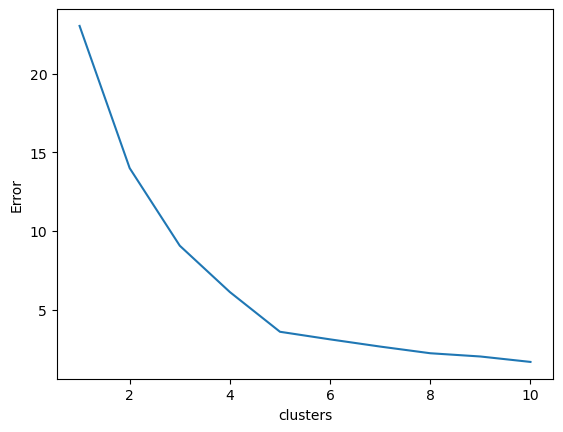

In [22]:
tabla_codo = pd.DataFrame(suma_error,columns=["clusters", "Error"])
sns.lineplot(data = tabla_codo, x = "clusters", y = "Error")

In [23]:
data = df_norm.loc[: , ['Spending Score (1-100)', 'Annual Income (k$)']]
modelo = KMeans(
    n_clusters = 5,
    n_init = 10,
    max_iter=300
)
modelo.fit(data)
df2= df.copy()
df2["Cluster"] = modelo.labels_

c:\Users\nicol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

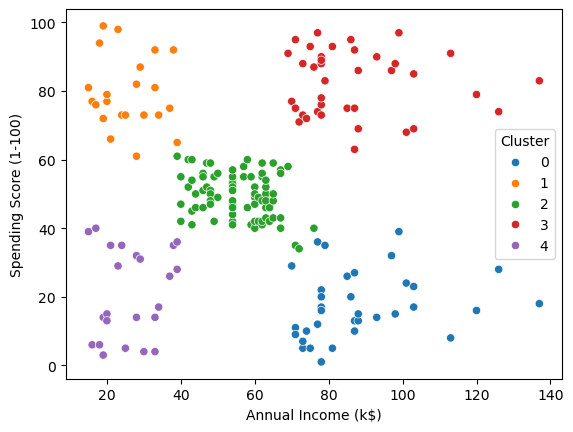

In [24]:
sns.scatterplot(
    data = df2,
    x = 'Annual Income (k$)', 
    y = "Spending Score (1-100)", 
    hue = "Cluster",
    palette = "tab10"
)

In [25]:
# Métricas para K-Means

silhouette_kmeans = silhouette_score(data, df2["Cluster"])
print("\nMétricas para K-Means:")
print("Silhouette Score:", silhouette_kmeans)


Métricas para K-Means:
Silhouette Score: 0.5594854531357839


In [26]:
df2.iloc[:,2:].groupby("Cluster").agg(["mean", "max", "min"])

Age         Annual Income (k$)          Spending Score (1-100)  \
              mean max min               mean  max min                   mean   
Cluster                                                                         
0        41.114286  59  19          88.200000  137  70              17.114286   
1        25.272727  35  18          25.727273   39  15              79.363636   
2        42.716049  70  18          55.296296   76  39              49.518519   
3        32.692308  40  27          86.538462  137  69              82.128205   
4        45.217391  67  19          26.304348   39  15              20.913043   

                 
        max min  
Cluster          
0        39   1  
1        99  61  
2        61  34  
3        97  63  
4        40   3

### Cluster 0: Adultos de ingresos bajos y bajo gasto
* **Edad promedio:** 45.2 años
  
* **Ingreso promedio:** $26.3$k$ (**el más bajo**)
  
* **Spending Score:** $20.9$ (**muy bajo**)

> **Interpretación:** Este grupo es el de ingresos más limitados. Su bajo ingreso los obliga a ser **extremadamente cautelosos y frugales** con sus gastos. Podrían estar enfocados exclusivamente en las necesidades básicas.

---

### Cluster 1: Adultos de ingresos medios y gasto moderado
* **Edad promedio:** 42.7 años
  
* **Ingreso promedio:** $55.3$k$

  
* **Spending Score:** $49.5$ (moderado)

> **Interpretación:** Es el **cluster más grande** ($\text{count}=81$) y representa al cliente más equilibrado y estable. Sus ingresos y gastos son moderados y se sitúan en el medio de la distribución. Son el **"cliente medio"** en la mayoría de los aspectos.

---

### Cluster 2: Jóvenes adultos con alto ingreso y alto gasto
* **Edad promedio:** 32.7 años
  
* **Ingreso promedio:** $86.5$k$ (**muy alto**)

* **Spending Score:** $82.1$ (**el más alto**)

> **Interpretación:** Clientes **jóvenes o profesionales en ascenso** que ganan mucho y **gastan en consecuencia**. Representan un **alto valor** para el negocio, ya que combinan una alta capacidad de gasto con altos ingresos.

---

### Cluster 3: Jóvenes con ingresos bajos pero gasto alto
* **Edad promedio:** 25.3 años (**los más jóvenes**)
  
* **Ingreso promedio:** $25.7$k$ (**muy bajo**)

* **Spending Score:** $79.4$ (**muy alto**)

> **Interpretación:** Este es un segmento **crítico y a menudo arriesgado**. Son jóvenes con bajos ingresos, pero una **alta propensión al gasto**. Es probable que su alto gasto sea impulsado por tendencias, experiencias o el uso intensivo de crédito.

---

### Cluster 4: Adultos con alto ingreso pero gasto muy bajo
* **Edad promedio:** 41.1 años
  
* **Ingreso promedio:** $88.2$k$ (**el más alto**)

* **Spending Score:** $17.1$ (**el más bajo**)

> **Interpretación:** Clientes con la **mayor capacidad financiera**, pero que eligen conscientemente gastar muy poco. Este grupo se enfoca casi con certeza en el **ahorro o la inversión**. Son un objetivo principal para productos de inversión o lujo duradero.

# Realizamos clusterización con las variables Age, Annual Income (k$) y Spending Score (1-100)

In [27]:
data = df_norm.loc[: , ['Age','Annual Income (k$)', 'Spending Score (1-100)']]
suma_error = []
for i in range(1 , 11):
    modelo = KMeans(
        n_clusters = i,
        n_init = 10 ,
        max_iter=300
    )
    modelo.fit(data)
    suma_error.append([i, modelo.inertia_])

c:\Users\nicol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nicol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nicol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nicol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

In [28]:
suma_error

[[1, 37.40148216035944],
 [2, 22.560774882609753],
 [3, 17.370109472896697],
 [4, 12.650287676229912],
 [5, 10.325690998546246],
 [6, 8.385099035848988],
 [7, 7.202724910415311],
 [8, 6.295379260252629],
 [9, 5.6407148473227195],
 [10, 5.022521706285214]]

<Axes: xlabel='clusters', ylabel='Error'>

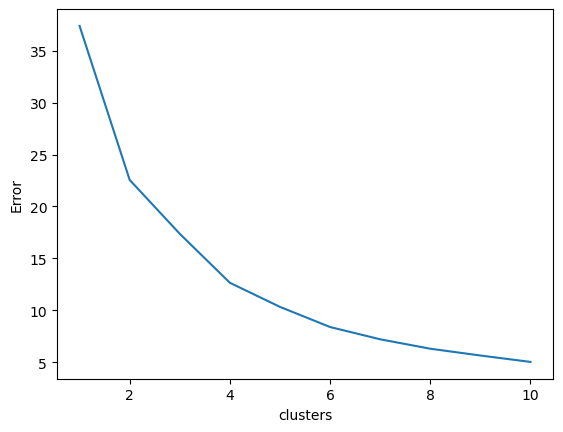

In [29]:
tabla_codo = pd.DataFrame(suma_error,columns=["clusters", "Error"])
sns.lineplot(data = tabla_codo, x = "clusters", y = "Error")

In [30]:
data = df_norm.loc[: , ['Age','Annual Income (k$)', 'Spending Score (1-100)']]
modelo = KMeans(
    n_clusters = 4,
    n_init = 10,
    max_iter=300
)
modelo.fit(data)
df3 = df.copy()
df3["Cluster"] = modelo.labels_

c:\Users\nicol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [31]:
from sklearn.metrics import silhouette_score

# Métricas para K-Means
silhouette_kmeans = silhouette_score(data, df3["Cluster"])
print("\nMétricas para K-Means:")
print("Silhouette Score:", silhouette_kmeans)


Métricas para K-Means:
Silhouette Score: 0.39231920205572207


In [32]:
df3.iloc[:,2:].groupby("Cluster").agg(["mean","count", "max", "min"])

Age               Annual Income (k$)                 \
              mean count max min               mean count  max min   
Cluster                                                              
0        32.875000    40  40  27          86.100000    40  137  69   
1        39.368421    38  59  19          86.500000    38  137  64   
2        25.438596    57  38  18          40.000000    57   67  15   
3        53.984615    65  70  35          47.707692    65   79  18   

        Spending Score (1-100)                
                          mean count max min  
Cluster                                       
0                    81.525000    40  97  58  
1                    19.578947    38  42   1  
2                    60.298246    57  99   6  
3                    39.969231    65  60   3

### Cluster 0: Adultos mayores con ingresos medios y gasto moderado
* **Edad promedio:** $54.0$ años (**los más mayores**)
  
* **Ingreso promedio:** $47.7$k$

* **Spending Score:** $40.0$

> **Interpretación:** Este es el grupo **más numeroso** ($\text{count}=65$). Representa a clientes **maduros, estables y cautelosos**. Sus gastos son moderados, probablemente limitados a las necesidades y productos de valor. Son una base de clientes fiel pero **sensibles al precio**.

---

### Cluster 1: Jóvenes adultos con ingresos altos y gasto elevado
* **Edad promedio:** $32.9$ años
  
* **Ingreso promedio:** $86.1$k$

* **Spending Score:** $81.5$ (**el más alto**)

> **Interpretación:** Este es el cliente de **mayor valor actual**. Son **jóvenes profesionales** que ganan muy bien y tienen la **mayor propensión a gastar** en bienes, servicios de lujo y experiencias. Son el objetivo principal para **campañas de alto margen**.

---

### Cluster 2: Adultos con ingresos altos pero gasto muy bajo
* **Edad promedio:** $39.4$ años
  
* **Ingreso promedio:** $86.5$k$ (**el más alto**)

* **Spending Score:** $19.6$ (**el más bajo**)

> **Interpretación:** Clientes con la **mayor capacidad financiera**, pero que son **extremadamente frugales o inversores agresivos**. Su bajo gasto sugiere que su capital se destina a la **acumulación de riqueza**. Este grupo es clave para **productos financieros (inversiones)** o bienes de lujo duraderos (activos).

---

### Cluster 3: Jóvenes con ingresos bajos y gasto alto
* **Edad promedio:** $25.4$ años (**los más jóvenes**)

* **Ingreso promedio:** $40.0$k$

* **Spending Score:** $60.3$

> **Interpretación:** Un grupo considerable ($\text{count}=57$) de adultos jóvenes que gastan de manera significativa a pesar de tener ingresos limitados. Priorizan el **consumo** (tendencias, moda, ocio) sobre el ahorro. Son sensibles a las **ofertas y las tendencias sociales**.

##  Conclusiones Clave de la Segmentación (Análisis de Modelos)

---

### 1. Superioridad Estadística y Robustez

El **Modelo 2** (Variables: Edad + Spending Score) presenta la **mejor cohesión y separación de grupos**.

* Este modelo, con un **Silhouette Score de 0.56** y $5$ clusters, es el **más robusto estadísticamente** de los tres.
* **Aporte de Valor:** Un score de $0.56$ indica que los grupos son significativamente distintos y que las asignaciones de clientes a los clusters son de alta confianza, lo cual es fundamental para la toma de decisiones.

---

### 2. Variables Clave y Patrones Determinantes

La **combinación de edad y comportamiento de compra** es el **factor más determinante** en la segmentación.

* Estas son las dos variables más influyentes y con la relación más limpia y diferenciadora en este conjunto de datos.
* Los clusters permiten identificar perfiles sociodemográficos y de consumo distintos:
    * **Jóvenes** que tienden a tener un **alto gasto** (comportamiento impulsivo o de tendencias).
    * **Adultos (edad media)** que presentan un **gasto medio** (consumo equilibrado).
    * **Mayores** que registran una **menor frecuencia de consumo** (gasto más bajo y prudente).

---

### 3. Recomendación Estratégica (Enfoque en Edad y Gasto)

Dado el éxito del Modelo 2, la estrategia de marketing debe pivotar hacia el **ciclo de vida y las tendencias generacionales**.

* **Enfoque:** Utilizar la edad del cliente (la variable con el mayor poder predictivo de gasto) para definir el tipo de producto/servicio a ofrecer.
* **Ejemplo:** Priorizar ofertas de **experiencias/tecnología** al segmento joven de alto gasto y ofertas de **salud/comodidad/fidelización** al segmento de mayor edad.
* **Nota:** El bajo Silhouette Score del Modelo 3 sugiere que la variable **Ingreso Anual** no aporta suficiente valor diferenciador cuando la Edad y el Gasto ya están incluidos, posiblemente debido a una alta correlación subyacente entre la edad y el ingreso.

In [33]:
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4


In [35]:
from sklearn.metrics import silhouette_samples, silhouette_score


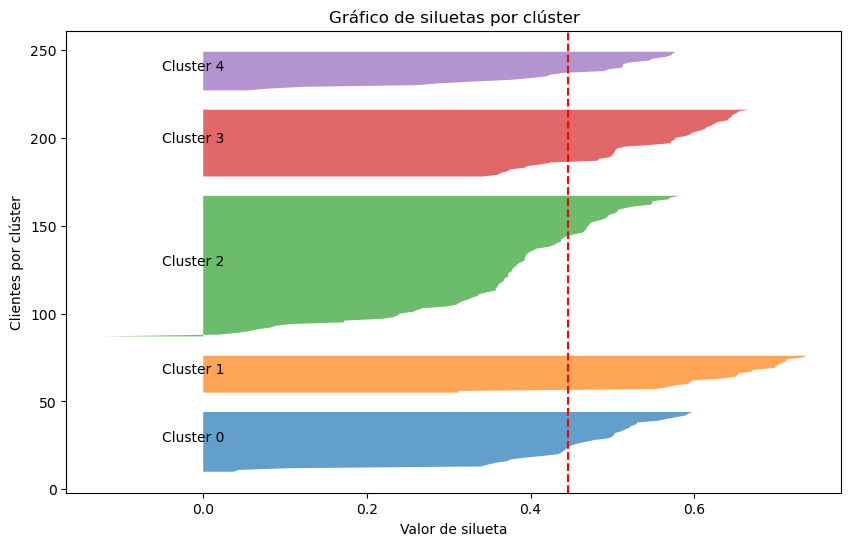

In [ ]:
X = df2[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
labels = df2["Cluster"].values

# Calcular valores de silueta
silhouette_vals = silhouette_samples(X, labels)
silhouette_avg = silhouette_score(X, labels)

# Graficar siluetas
plt.figure(figsize=(10, 6))
y_lower = 10
for i in np.unique(labels):
    ith_cluster_silhouette_vals = silhouette_vals[labels == i]
    ith_cluster_silhouette_vals.sort()
    
    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i
    
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_vals,
                      alpha=0.7)
    
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, f"Cluster {i}")
    y_lower = y_upper + 10

plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.xlabel("Valor de silueta")
plt.ylabel("Clientes por clúster")
plt.title("Gráfico de siluetas por clúster")
plt.show()

In [38]:
df2.iloc[:,2:].groupby("Cluster").agg(["max","mean","min"]).round(1)

Age           Annual Income (k$)           Spending Score (1-100)  \
        max  mean min                max  mean min                    max   
Cluster                                                                     
0        59  41.1  19                137  88.2  70                     39   
1        35  25.3  18                 39  25.7  15                     99   
2        70  42.7  18                 76  55.3  39                     61   
3        40  32.7  27                137  86.5  69                     97   
4        67  45.2  19                 39  26.3  15                     40   

                   
         mean min  
Cluster            
0        17.1   1  
1        79.4  61  
2        49.5  34  
3        82.1  63  
4        20.9   3

In [39]:
# 0 = Adulto ingreso bajo y gasto bajo
# 1 = Adulto ingreso medio y gasto moderado
# 2 = Joven ingreso alto y gasto alto
# 3 = Adulto ingreso alto y gasto muy bajo
# 4 = Joven ingreso bajo y gasto alto

df2["Cluster"] = df2["Cluster"].map(
    {
        0: 'Adulto ingreso bajo y gasto bajo',
        1: 'Adulto ingreso medio y gasto moderado',
        2: 'Joven ingreso alto y gasto alto',
        3: 'Adulto ingreso alto y gasto muy bajo',
        4: 'Joven ingreso bajo y gasto alto',
    }
)

In [40]:
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,Joven ingreso bajo y gasto alto
1,2,Male,21,15,81,Adulto ingreso medio y gasto moderado
2,3,Female,20,16,6,Joven ingreso bajo y gasto alto
3,4,Female,23,16,77,Adulto ingreso medio y gasto moderado
4,5,Female,31,17,40,Joven ingreso bajo y gasto alto


In [41]:
# Cantidad de hombre y mujeres en cada cluster:

df2.groupby(["Cluster", "Gender"]).size()

Cluster                                Gender
Adulto ingreso alto y gasto muy bajo   Female    21
                                       Male      18
Adulto ingreso bajo y gasto bajo       Female    16
                                       Male      19
Adulto ingreso medio y gasto moderado  Female    13
                                       Male       9
Joven ingreso alto y gasto alto        Female    48
                                       Male      33
Joven ingreso bajo y gasto alto        Female    14
                                       Male       9
dtype: int64

Text(0, 0.5, 'Spending Score (1-100)')

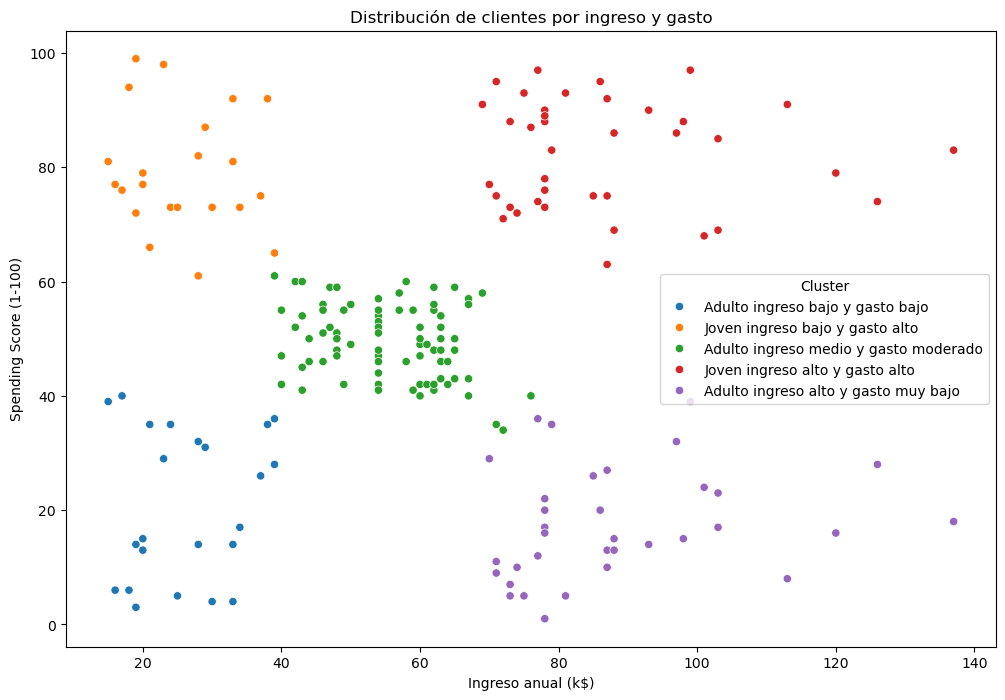

In [104]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df2,
    x='Annual Income (k$)', 
    y='Spending Score (1-100)', 
    hue='Cluster',
    palette='tab10'
)

plt.title("Distribución de clientes por ingreso y gasto")
plt.xlabel("Ingreso anual (k$)")
plt.ylabel("Spending Score (1-100)")
